# Supervised Machine Learning by @attzulkafli.

## Linear Regression

#### 
$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x, also called slope

<img src="../images/slope_intercept.png">

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. Fitting a model to data means to "learn" the optimal values for these coefficients.


<img src="../images/estimating_coefficients.png">

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.datasets

sns.set()

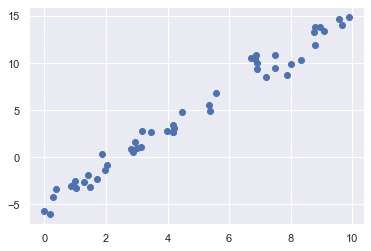

In [18]:
# Create random data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = -5 + 2 * x + rng.randn(50)
plt.scatter(x, y);

###  Step 1 - Choose model hyperparameters 

If we set this to `False`, then Python expects the data to be centered and simply sets $\beta_0 = 0$. 

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

### Step 2 - Arrange data into a features matrix and target vector

<img src="../images/numpy_array.png">

In [21]:
print("Shape of x: {}".format(x.shape))

Shape of x: (50,)


In [22]:
x = x[:,np.newaxis]
print("Shape of x: {}".format(x.shape))
print(x)

Shape of x: (50, 1)
[[4.17022005e+00]
 [7.20324493e+00]
 [1.14374817e-03]
 [3.02332573e+00]
 [1.46755891e+00]
 [9.23385948e-01]
 [1.86260211e+00]
 [3.45560727e+00]
 [3.96767474e+00]
 [5.38816734e+00]
 [4.19194514e+00]
 [6.85219500e+00]
 [2.04452250e+00]
 [8.78117436e+00]
 [2.73875932e-01]
 [6.70467510e+00]
 [4.17304802e+00]
 [5.58689828e+00]
 [1.40386939e+00]
 [1.98101489e+00]
 [8.00744569e+00]
 [9.68261576e+00]
 [3.13424178e+00]
 [6.92322616e+00]
 [8.76389152e+00]
 [8.94606664e+00]
 [8.50442114e-01]
 [3.90547832e-01]
 [1.69830420e+00]
 [8.78142503e+00]
 [9.83468338e-01]
 [4.21107625e+00]
 [9.57889530e+00]
 [5.33165285e+00]
 [6.91877114e+00]
 [3.15515631e+00]
 [6.86500928e+00]
 [8.34625672e+00]
 [1.82882773e-01]
 [7.50144315e+00]
 [9.88861089e+00]
 [7.48165654e+00]
 [2.80443992e+00]
 [7.89279328e+00]
 [1.03226007e+00]
 [4.47893526e+00]
 [9.08595503e+00]
 [2.93614148e+00]
 [2.87775339e+00]
 [1.30028572e+00]]


### Step 3 - Fit the model to your data

In [23]:
model.fit(x,y)

LinearRegression()

use *.intercept_ to find beta_0/y-intercept

In [24]:
model.intercept_

-4.998577085553202

use *.coef_ to find slope/beta_1

In [25]:
model.coef_

array([2.02720881])

### Step 4 - Visually inspect the fit

In [26]:
yfit = model.predict(x)

In [27]:
print("Shape of yfit: {}".format(yfit.shape))
print(yfit)

Shape of yfit: (50,)
[ 3.45532973  9.60390451 -4.99625847  1.13033546 -2.02352874 -3.12668096
 -1.22269367  2.00666042  3.04472811  5.92436322  3.49937104  8.892253
 -0.85390307 12.80269695 -4.44337338  8.59319935  3.46106263  6.32723234
 -2.1526407  -0.98264625 11.23418736 14.63010688  1.35518547  9.03624798
 12.76766102 13.13696802 -3.27455334 -4.20685508 -1.55575986 12.80320511
 -3.00488141  3.53815379 14.41984386  5.80979655  9.02721673  1.39758358
  8.9182302  11.92102807 -4.62783552 10.20841456 15.04770203 10.16830298
  0.68660823 11.001763   -2.90597039  4.08115994 13.420551    0.9535948
  0.83522993 -2.36262642]


In [28]:
x[0]

array([4.17022005])

In [29]:
y[0]

2.653267393931881

In [30]:
model.intercept_ + model.coef_ * x[0]

array([3.45532973])

### Let's plot the data 

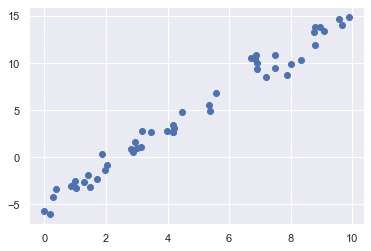

In [31]:
plt.scatter(x, y);

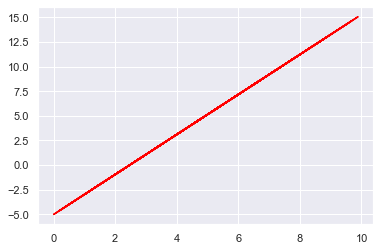

In [32]:
plt.plot(x, yfit, color='red');

by joining both the linear line and our graph, we will get result as below 

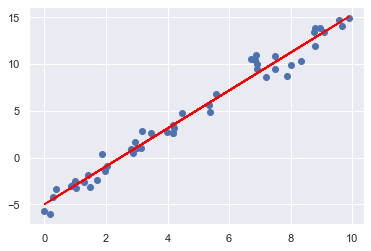

In [33]:
plt.scatter(x, y);
plt.plot(x, yfit, color='red');

In [34]:
print("Model slope (B1):    ", model.coef_)
print("Model intercept (B0):", model.intercept_)

Model slope (B1):     [2.02720881]
Model intercept (B0): -4.998577085553202


### How well does the model fit the data?
The quality of a linear regression fit is most commonly described with the **mean squared error (MSE)**, which computes the average of the squared differences between observed and predicted target values:

$$MSE = \frac{1}{N} \cdot \sum_i^N (y_i - \hat y_i)^2$$

where:
- $y_i$ represents the observed target value for $x_i$
- $\hat y_i$ represents the predicted target value for $x_i$ as per the learned parameters.
- $N$ is equal to the number of observations

We can easily compute the mean squared error with scikit-learn;

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:

mean_squared_error(y_true=y, y_pred=yfit)

0.818338857026618

#### Another statistical measure is the **coefficient of determination** (also referred to as $R^2$ or R-Squared). $R^2$ describes the ratio of the mean squared error of the model compared to the mean squared error of the **null model**, which is simply a horizontal line through the mean of the observed target variables ($\beta_0 = mean(y_1, ..., y_N)$ and $\beta_1 = 0$)"

$$R^2 = 1 - \frac{MSE_{model}}{MSE_{null}}$$

where:
- $MSE_{model} = \frac{1}{N} \cdot \sum_i^N (y_i - \hat y_i)^2$ (as above)
- $MSE_{null} = \frac{1}{N} \cdot \sum_i^N (y_i - \bar y)^2$
- and $\bar y = mean(y_1, ..., y_N)$ is the mean of all observed target values.

In other words, $R^2$ is one minus the the ratio of the blue area to the red area.

<img src="../images/Coefficient_of_Determination.svg" />

Another way of phrasing this is that $R^2$ is the fraction of variance in the data that can be explained by the model. It (usually) lies between 0 and 1, and higher is better because it means that more variance is explained by the model. The remaining variance in data is due to complex relationships between features and target values not considered by the model and random noise.

Note that a perfect $R^2 = 1$ should be regarded with suspicion. This means that:

- The model fully describes the relationship between features and target values
- There is no randomness in the data

both of which are extremely unlikely in any real-life scenario.

Scikit-Learn also lets us compute the $R^2$ score:

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_true=y, y_pred=yfit)

0.9790800609430612

### Exercise 1 - Create your first Linear Regression model

Given the following X and y, train a linear regression model and show the results.

- Create and fit the model using intercept=True
- Show the trained parameters (intercept and slope)
- Show the MSE and R2 for the predicted target values $\hat{y_i}$
- Plot the original datapoints and the regression line
- Repeat the previous steps with intercept=False

The data:

In [39]:
rng = np.random.RandomState(1)
X_1 = 100 * rng.rand(50)
Y_1 = 26 * X_1 - 722 + rng.randn(50)*200

In [40]:
# tukar dimension dulu
X_1 = X_1[:,np.newaxis]

In [41]:
#Create and fit the model using intercept=True
model_1 = LinearRegression(fit_intercept=True)
model_1.fit(X_1,Y_1)
model_1

LinearRegression()

In [42]:
#Show the trained parameters (intercept and slope)
print("the slope is {}".format(model_1.coef_))
print("the y-intercept is {}". format(model_1.intercept_))

the slope is [26.54417621]
the y-intercept is -721.7154171106408


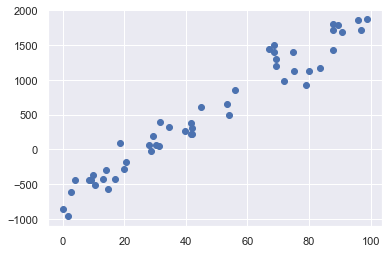

In [45]:
plt.scatter(X_1,Y_1)

In [51]:
yfit_1 = model_1.predict(X_1)
#Show the MSE and R2 for the predicted target values  𝑦𝑖^
MSE = mean_squared_error(y_true=Y_1, y_pred=yfit_1)
R2 = r2_score(y_true=Y_1, y_pred=yfit_1)

print("MSE = {}".format(MSE))
print("R2 = {}".format(R2))

MSE = 32733.554281064695
R2 = 0.9525174944395889


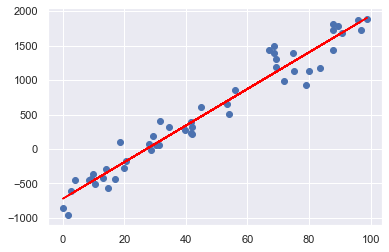

In [55]:
#Plot the original datapoints and the regression line
plt.scatter(X_1,Y_1)
plt.plot(X_1,yfit_1, c='red')

### Linear Regression code in one cell 

LinearRegression()
the slope is [26.54417621]
the y-intercept is -721.7154171106408
MSE = 32733.554281064695
R2 = 0.9525174944395889


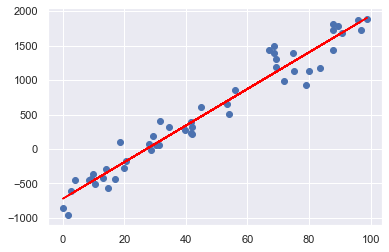

In [56]:
# Code to fit in one cell
rng = np.random.RandomState(1)
X_2 = 100 * rng.rand(50)
Y_2 = 26 * X_2 - 722 + rng.randn(50)*200

# tukar dimension dulu
X_2 = X_2[:,np.newaxis]

#Create and fit the model using intercept=True
model_2 = LinearRegression(fit_intercept=True)
model_2.fit(X_2,Y_2)
print(model_2)

#Show the trained parameters (intercept and slope)
print("the slope is {}".format(model_2.coef_))
print("the y-intercept is {}". format(model_2.intercept_))

yfit_2 = model_2.predict(X_2)

#Show the MSE and R2 for the predicted target values  𝑦𝑖^
print("MSE = {}".format(mean_squared_error(y_true=Y_2, y_pred=yfit_2)))
print("R2 = {}".format(r2_score(y_true=Y_2, y_pred=yfit_2)))

#Plot the original datapoints and the regression line
plt.scatter(X_2,Y_2)

plt.plot(X_2,yfit_2, c='red')

#  example

LinearRegression()
the slope is [1.96741192]
the y-intercept is -4.919203607672241
MSE = 1.2866375633242018
R2 = 0.9276472543676397


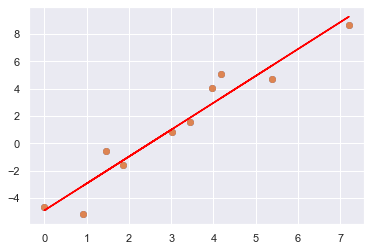

In [57]:
# Create random data
rng = np.random.RandomState(1)
X = 10 * rng.rand(10)
Y = -5 + 2 * X + rng.randn(10)
plt.scatter(X, Y);

# tukar dimension x dulu
X = X[:,np.newaxis]

#Create and fit the model using intercept=True
modell = LinearRegression(fit_intercept=True)
modell.fit(X,Y)
print(modell)

#Show the trained parameters (intercept and slope)
print("the slope is {}".format(modell.coef_))
print("the y-intercept is {}". format(modell.intercept_))

yfit = modell.predict(X)

#Show the MSE and R2 for the predicted target values  𝑦𝑖^
print("MSE = {}".format(mean_squared_error(y_true=Y, y_pred=yfit)))
print("R2 = {}".format(r2_score(y_true=Y, y_pred=yfit)))

#Plot the original datapoints and the regression line
plt.scatter(X,Y)
plt.plot(X,yfit, c='red')

In [12]:
X[0]

array([4.17022005])

In [13]:
Y[0]

5.08525185826796

In [24]:
yfit[0]

3.2853370231613948

y=mx + c, replace the x with value to get y

In [31]:
#y =  c + m * x
modell.intercept_ + modell.coef_ * 4.170

array([3.2849041])